# Sheet 1 - Introduction
#### By: Genivika Mann, Jonah, Fatemeh Salehi, Helia Salimi, Fabrice Beaumont

## Ex1 - Descriptive Statistics & Data Visualization

### 1. Load the Iris dataset into your notebook from Scikit-Learn.

In [1]:
### 1.Load the Iris dataset into your notebook from Scikit-Learn
from sklearn.datasets import load_iris
import pandas as pd
data = load_iris()

### 2. Report the descriptive statistics of the features of the iris dataset.

In [2]:
### The following description returns some statistics, but not all desired ones
# print(data.DESCR)
# ============== ==== ==== ======= ===== ====================
#                 Min  Max   Mean    SD   Class Correlation
# ============== ==== ==== ======= ===== ====================
# sepal length:   4.3  7.9   5.84   0.83    0.7826
# sepal width:    2.0  4.4   3.05   0.43   -0.4194
# petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
# petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
# ============== ==== ==== ======= ===== ====================

In [3]:
### Lets use Pandas dataframes to get the data more easily
data, target = load_iris(return_X_y=True,as_frame=True)

### Again, we can easily access the already stored means. For example with:
data.mean()

sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

In [4]:
### Or with:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### a. Mean, Median, Mode

In [5]:
### Besides this, we can use many built in functions to receive the desired values
data.mean()

sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

In [6]:
data.median()

sepal length (cm)    5.80
sepal width (cm)     3.00
petal length (cm)    4.35
petal width (cm)     1.30
dtype: float64

In [7]:
### The mode of a set of values is the value that appears most often.
data.mode()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.0,3.0,1.4,0.2
1,NaN,NaN,1.5,NaN


### b. Variance, MAD, Standard deviation

In [8]:
data.var()

sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64

In [9]:
### The MAD is the Mean Absolute Deviation of the values over the requested axis.
data.mad()

sepal length (cm)    0.687556
sepal width (cm)     0.336782
petal length (cm)    1.562747
petal width (cm)     0.658133
dtype: float64

In [10]:
data.std()

sepal length (cm)    0.828066
sepal width (cm)     0.435866
petal length (cm)    1.765298
petal width (cm)     0.762238
dtype: float64

### c. Quantiles, IQR

In [11]:
data.quantile()

sepal length (cm)    5.80
sepal width (cm)     3.00
petal length (cm)    4.35
petal width (cm)     1.30
Name: 0.5, dtype: float64

In [12]:
### By definition the IQR is the interquartile range and can be computed as
### the difference between 75th and 25th percentiles
data.quantile(0.75) - data.quantile(0.25)

sepal length (cm)    1.3
sepal width (cm)     0.5
petal length (cm)    3.5
petal width (cm)     1.5
dtype: float64

### 3. Plot a density plot for each of the variables. Interpret the plots.

In [13]:
df_MeanMedianMode = pd.DataFrame({
    'mean': data.mean(),
    'median': data.median(),
    ### We assume that "each of the variables" excludes the mode
})
df_MeanMedianMode.plot.density()

<AxesSubplot:ylabel='Density'>

#### Interpretation: The plot indicates, that the density of the mean is higher for values above '4'. This could indicate, that there are more lower extreme values (dragging down the median).

<AxesSubplot:ylabel='Density'>

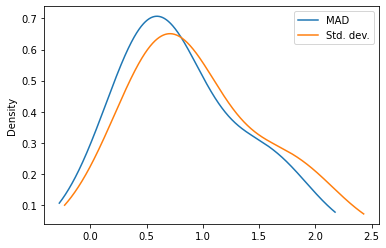

In [14]:
df_MADStd = pd.DataFrame({
    'MAD': data.mad(),
    'Std. dev.': data.std(),
})
df_MADStd.plot.density()

#### Interpretation: TODO

<AxesSubplot:ylabel='Density'>

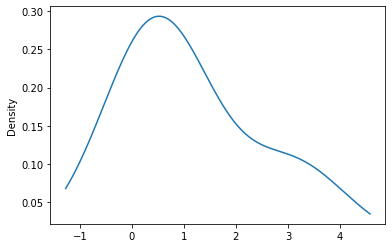

In [15]:
data.var().plot.density()

#### Interpretation: TODO

### 4. Create a violin plot for the sepal width feature for each class. What can be seen from the plots?

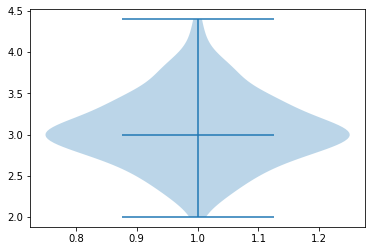

In [16]:
import numpy as np
import matplotlib.pyplot as plt

plt.violinplot(data['sepal width (cm)'].values, showmeans=False, showmedians=True)
plt.show()

#### Interpretation: The distribution in the data set closely resembles a Gaussian bell with median sepal width of 3 cm.

## Ex2 - Data Pre-processing

### 1. Load the heart dataset from the given heart.csv file. How many rows and columns does the dataset contain?

In [17]:
df = pd.read_csv("heart.csv")
nr_rows, nr_cols = df.shape
print(f"The dataset contains {nr_rows} rows and {nr_cols} columns.")

The dataset contains 312 rows and 14 columns.


### 2. How many unique values does each column contain?

In [18]:
for col in df.columns:
    print(f"{len(df[col].unique())} \t unique values are contained in column '{col}'.")

41 	 unique values are contained in column 'age'.
3 	 unique values are contained in column 'sex'.
5 	 unique values are contained in column 'cp'.
50 	 unique values are contained in column 'trestbps'.
153 	 unique values are contained in column 'chol'.
3 	 unique values are contained in column 'fbs'.
4 	 unique values are contained in column 'restecg'.
92 	 unique values are contained in column 'thalach'.
2 	 unique values are contained in column 'exang'.
41 	 unique values are contained in column 'oldpeak'.
4 	 unique values are contained in column 'slope'.
6 	 unique values are contained in column 'ca'.
5 	 unique values are contained in column 'thal'.
2 	 unique values are contained in column 'target'.


### 3. Count the number of duplicate rows in the dataset. How can you remove the duplicate rows?

In [19]:
import numpy as np
### To get the number of duplicates, collect them via 'duplicated'
### And then count them, by summing every 'True' value
nr_duplicated_rows = np.sum(df.duplicated())
print(f"There are {nr_duplicated_rows} duplicated rows.") 
# Result: 9

There are 9 duplicated rows.


In [20]:
### We can get rid of the duplicates by calling the respective method.
### Note that the method RETURNS a duplicate free DataFrame and does not change the input itself.
df = df.drop_duplicates()
### And checking that zero duplicates are left:
if np.sum(df.duplicated()) == 0: print("No more duplicates present!")
nr_rows, nr_cols = df.shape
print(f"The dataset contains {nr_rows} rows and {nr_cols} columns.")

No more duplicates present!
The dataset contains 303 rows and 14 columns.


### 4. Count the number of missing values in the dataset.

In [21]:
### We can use the function 'isnull' to mark every NaN/missing value with True
### Call 'sum' two times to sum their number over both columns and rows
nr_missing_values = df.isna().sum().sum() # similar function 'isnull'
print(f"There are {nr_missing_values} values missing (or NaN).")
# Result: 17

There are 17 values missing (or NaN).


### 5. How can you deal with missing values in your dataset? Implement one of the possible methods.

In [22]:
### We can fill NaN/null/missing values in a datasets with the
### 'fillna', 'replace' and 'interpolate' functions.

### The 'interpolate' function is basically used to fill NaN values in the dataframe
### but it uses various interpolation technique to fill the missing values rather than hard-coding the value.

df = df.fillna(0) # missing -> 0.0
# df.fillna(method ='pad') # missing -> previous value - will not fill missing values in the first row
# df.fillna(method ='bfill') # missing -> next value - will not fill missing values in the last row
# df.interpolate(method ='linear', limit_direction ='forward') # missing -> linear interpolated artificial value

### Again, let us check, if this has worked:
print(f"There are {df.isna().sum().sum()} values missing (or NaN).")

There are 0 values missing (or NaN).


## Ex3 - Correlation

### 1. Load the dataset from the given dataset.tsv file.

In [23]:
### We can use the 'read_csv' function, but since the data is not
### comma-separated but tabular-separated, we need to specify the separator accordingly
df = pd.read_csv("dataset.tsv", sep='\t')
### Lets remove the 'unnamed' column. It is redundant with the row indices.
df.drop(df.columns[0], axis=1, inplace=True)

### 2. Plot the scatterplot matrix for the given dataset. What can be seen in the scatterplot matrix?

AttributeError: 'AxesSubplot' object has no attribute 'rowNum'

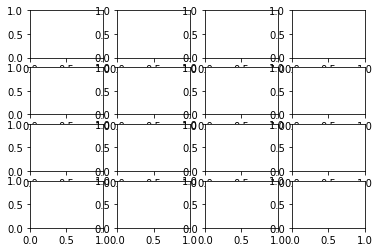

In [24]:
pd.plotting.scatter_matrix(df, alpha=1)

### 3. Which correlation would suit the comparison of feature_1 and feature_3? Calculate the relevant correlation coefficient for the 2 features.

<AxesSubplot:xlabel='feature_1', ylabel='feature_3'>

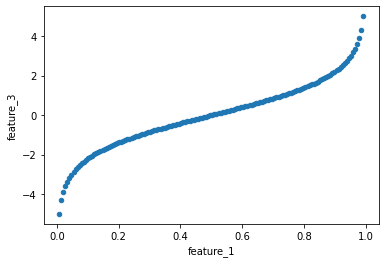

In [25]:
df.plot.scatter(x='feature_1', y='feature_3')

#### The correlation between the two features is positive and almost linear. The values of feature 1 increase iff the values of feature 2 increase. It seems to resemble a spearman's rank correlation (non-linear dependency).

In [26]:
correlation = df.corr(method='spearman')
print('Spearman correlation between feature 1 and 3 is', correlation.iloc[0,2])

Spearman correlation between feature 1 and 3 is 1.0


### 4. Plot the correlation heatmap of the entire dataset.

<AxesSubplot:>

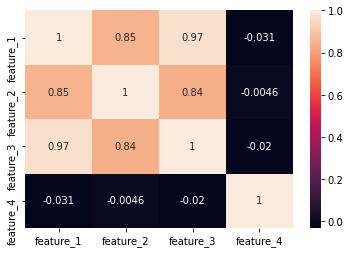

In [27]:
import seaborn as sns

Var_Corr = df.corr()
# plot the heatmap and annotation on it
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True)